# Sampling via Rejection

Recall that in the lecture, we discussed rejection sampling for two different cases for a $\text{Beta}(2,2)$ density

- Using a uniform proposal density
- Using a Gaussian density.

Uniform (box) example had $M = 1.5$ whereas Gaussian had $M = 1.3$. Of course the acceptance rates are respectively $\hat{a}_{\text{box}} = 1/1.5 \approx 0.67$ and $\hat{a}_{\text{Gauss}} = 1/1.3 \approx 0.76$. We will test this now numerically (by counting the ratio of accepted samples).

Let us first get our basics. We will define the densities and their log-densities (as we do not want to implement the densities due to possible numerical errors).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(52) # random number generator

# compute beta pdf
def beta_pdf(x, a, b):
    return 6 * x**(a-1) * (1-x)**(b-1)

def gaussian_function(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

def log_gaussian_function(x, mu, sigma):
    return - np.log(sigma * np.sqrt(2 * np.pi)) - (x - mu)**2 / (2 * sigma**2)

def log_beta_pdf(x, a, b):
    return np.log(6) + (a-1) * np.log(x) + (b-1) * np.log(1-x)

Let us now plot the $\text{Beta}(2,2)$ density and the uniform and Gaussian proposal densities.

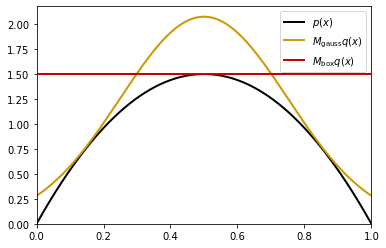

In [2]:
# plot beta pdf
xx = np.linspace(0, 1, 1000)

# beta parameters
a = 2
b = 2

m = 0.5 # mean for the Gaussian proposal
v = 0.25 # variance for the Gaussian proposal

M_gauss = 1.3 # for the Gaussian as shown in the lecture
M_box = 1.5 # for the box as shown in the lecture

plt.plot(xx, beta_pdf(xx, a, b), color='k', linewidth=2)
plt.plot(xx, M_gauss * gaussian_function(xx, m, v), color=[0.8, 0.6, 0], linewidth=2)
plt.plot(xx, M_box * np.ones(len(xx)), color=[0.8, 0, 0], linewidth=2)
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.legend(["$p(x)$", "$M_{\\text{gauss}} q(x)$", "$M_{\\text{box}} q(x)$"])
plt.show()

We will now efficiently show a few things

- How to implement rejection sampling
- Comparison of acceptance rates of two proposal densities as predicted above

Let us write now a sampler function for different proposals.

In [3]:
def beta_rej_sampler_uniform_proposal(N, a, b, M):

    # N will be the number of trials but due to rejections, we might not get N samples
    # a and b are the parameters of the beta distribution
    # M is the maximum of the ratio of the beta pdf and the proposal pdf (hand computed)

    acc_samples = np.array([]) # accepted samples

    for i in range(N): # writing a for loop for the sake of clarity
        x_prop = rng.uniform(0, 1) # sample from the proposal
        u = rng.uniform(0, 1) # sample from the uniform distribution

        # the following step is u < p / M*q (in the log-domain for stability)
        if np.log(u) < log_beta_pdf(x_prop, a, b) - np.log(M):
            acc_samples = np.append(acc_samples, x_prop)
        
    acc_rate = len(acc_samples) / N
    return acc_samples, acc_rate

def beta_rej_sampler_gaussian_proposal(N, a, b, m, v, M):
    
        # N will be the number of trials but due to rejections, we might not get N samples
        # a and b are the parameters of the beta distribution
        # m and v are the parameters of the Gaussian proposal
        # M is the maximum of the ratio of the beta pdf and the proposal pdf (hand computed)
    
        acc_samples = np.array([]) # accepted samples
    
        for i in range(N): # writing a for loop for the sake of clarity
            x_prop = rng.normal(m, v) # sample from the proposal
            u = rng.uniform() # sample from the uniform distribution
    
            # the following step is u < p / M*q (in the log-domain for stability)
            if np.log(u) < log_beta_pdf(x_prop, a, b) - log_gaussian_function(x_prop, m, v) - np.log(M):
                acc_samples = np.append(acc_samples, x_prop)
            
        acc_rate = len(acc_samples) / N
        return acc_samples, acc_rate

With these functions at hand, we will now test the acceptance rates.

In [4]:
N = 10000
m = 0.5
v = 0.25

# beta parameters
a = 2
b = 2

M_gauss = 1.3 # for the Gaussian as shown in the lecture
M_box = 1.5 # for the box as shown in the lecture

# uniform proposal
acc_samples_box, acc_rate_box = beta_rej_sampler_uniform_proposal(N, a, b, M_box)
print("Acceptance rate for the box proposal: ", acc_rate_box)
print("Theoretical acceptance rate for the box proposal: ", 1/M_box)

# Gaussian proposal
acc_samples_gauss, acc_rate_gauss = beta_rej_sampler_gaussian_proposal(N, a, b, m, v, M_gauss)
print("Acceptance rate for the Gaussian proposal: ", acc_rate_gauss)
print("Theoretical acceptance rate for the Gaussian proposal: ", 1/M_gauss)

Acceptance rate for the box proposal:  0.67
Theoretical acceptance rate for the box proposal:  0.6666666666666666
Acceptance rate for the Gaussian proposal:  0.7686
Theoretical acceptance rate for the Gaussian proposal:  0.7692307692307692


<ipython-input-1-cb8125c40062>:17: RuntimeWarning: invalid value encountered in log
  return np.log(6) + (a-1) * np.log(x) + (b-1) * np.log(1-x)


As can be seen from the output, theoretical acceptance rates matches empirical acceptance rates.

We can also plot histograms. For the box proposal, we get the following histogram.

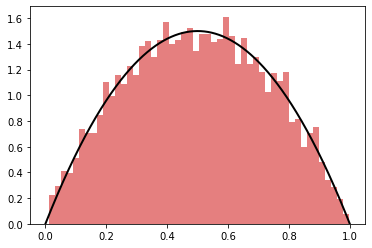

In [5]:
plt.hist(acc_samples_box, bins=50, density=True, color=[0.8, 0, 0], alpha=0.5)
plt.plot(xx, beta_pdf(xx, a, b), color='k', linewidth=2)
plt.show()

For the Gaussian proposal, we get the following histogram.

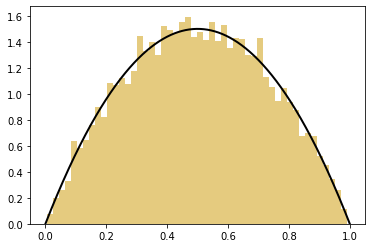

In [6]:
plt.hist(acc_samples_gauss, bins=50, density=True, color=[0.8, 0.6, 0], alpha=0.5)
plt.plot(xx, beta_pdf(xx, a, b), color='k', linewidth=2)
plt.show()